EV

In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df=pd.read_csv("Dataset/ev.csv")

In [3]:
df.size

1818

In [4]:
df.shape

(202, 9)

In [5]:
df.columns.values.tolist()

['no',
 'region',
 'address',
 'aux addres',
 'latitude',
 'longitude',
 'type',
 'power',
 'service']

In [6]:
features = df.columns.values.tolist()

In [7]:
df.tail()

,no,region,address,aux addres,latitude,longitude,type,power,service
197,198,ANERT,"State Council For Child Welfare, CV Raman Pill...","Electric Vehicle Charger, State Council For Ch...",8.491622,76.956247,CCS/ChADEMO/ Type 2 AC,142kW,Self Service
198,199,ANERT,"Shanghumukham beach, thiruvananthapuram,Kerala...","Electric Vehicle Charger, Shanghumukham beach,...",8.481051,76.912622,DC-001,15 kW,Self Service
199,200,ANERT,"KTDC Tourist Reception Centre Shanmugham road,...","Electric Vehicle Charger, KTDC Tourist Recepti...",9.976921,76.277781,DC-001,15 kW,Self Service
200,201,ANERT,"State Council For Child Welfare, CV Raman Pill...","Electric Vehicle Charger, State Council For Ch...",8.491622,76.956247,DC-001,15 kW,Self Service
201,202,SDMC,"EESL PVR Priya Vasant Vihar, SDMC parking New ...","Electric Vehicle Charger, EESL PVR Priya Vasan...",28.557662,77.157684,DC-001,15 kW,Self Service


In [8]:
df.dtypes


no              int64
region         object
address        object
aux addres     object
latitude      float64
longitude     float64
type           object
power          object
service        object
dtype: object

In [9]:
df.isnull().sum()

no            0
region        0
address       0
aux addres    0
latitude      0
longitude     0
type          0
power         0
service       0
dtype: int64

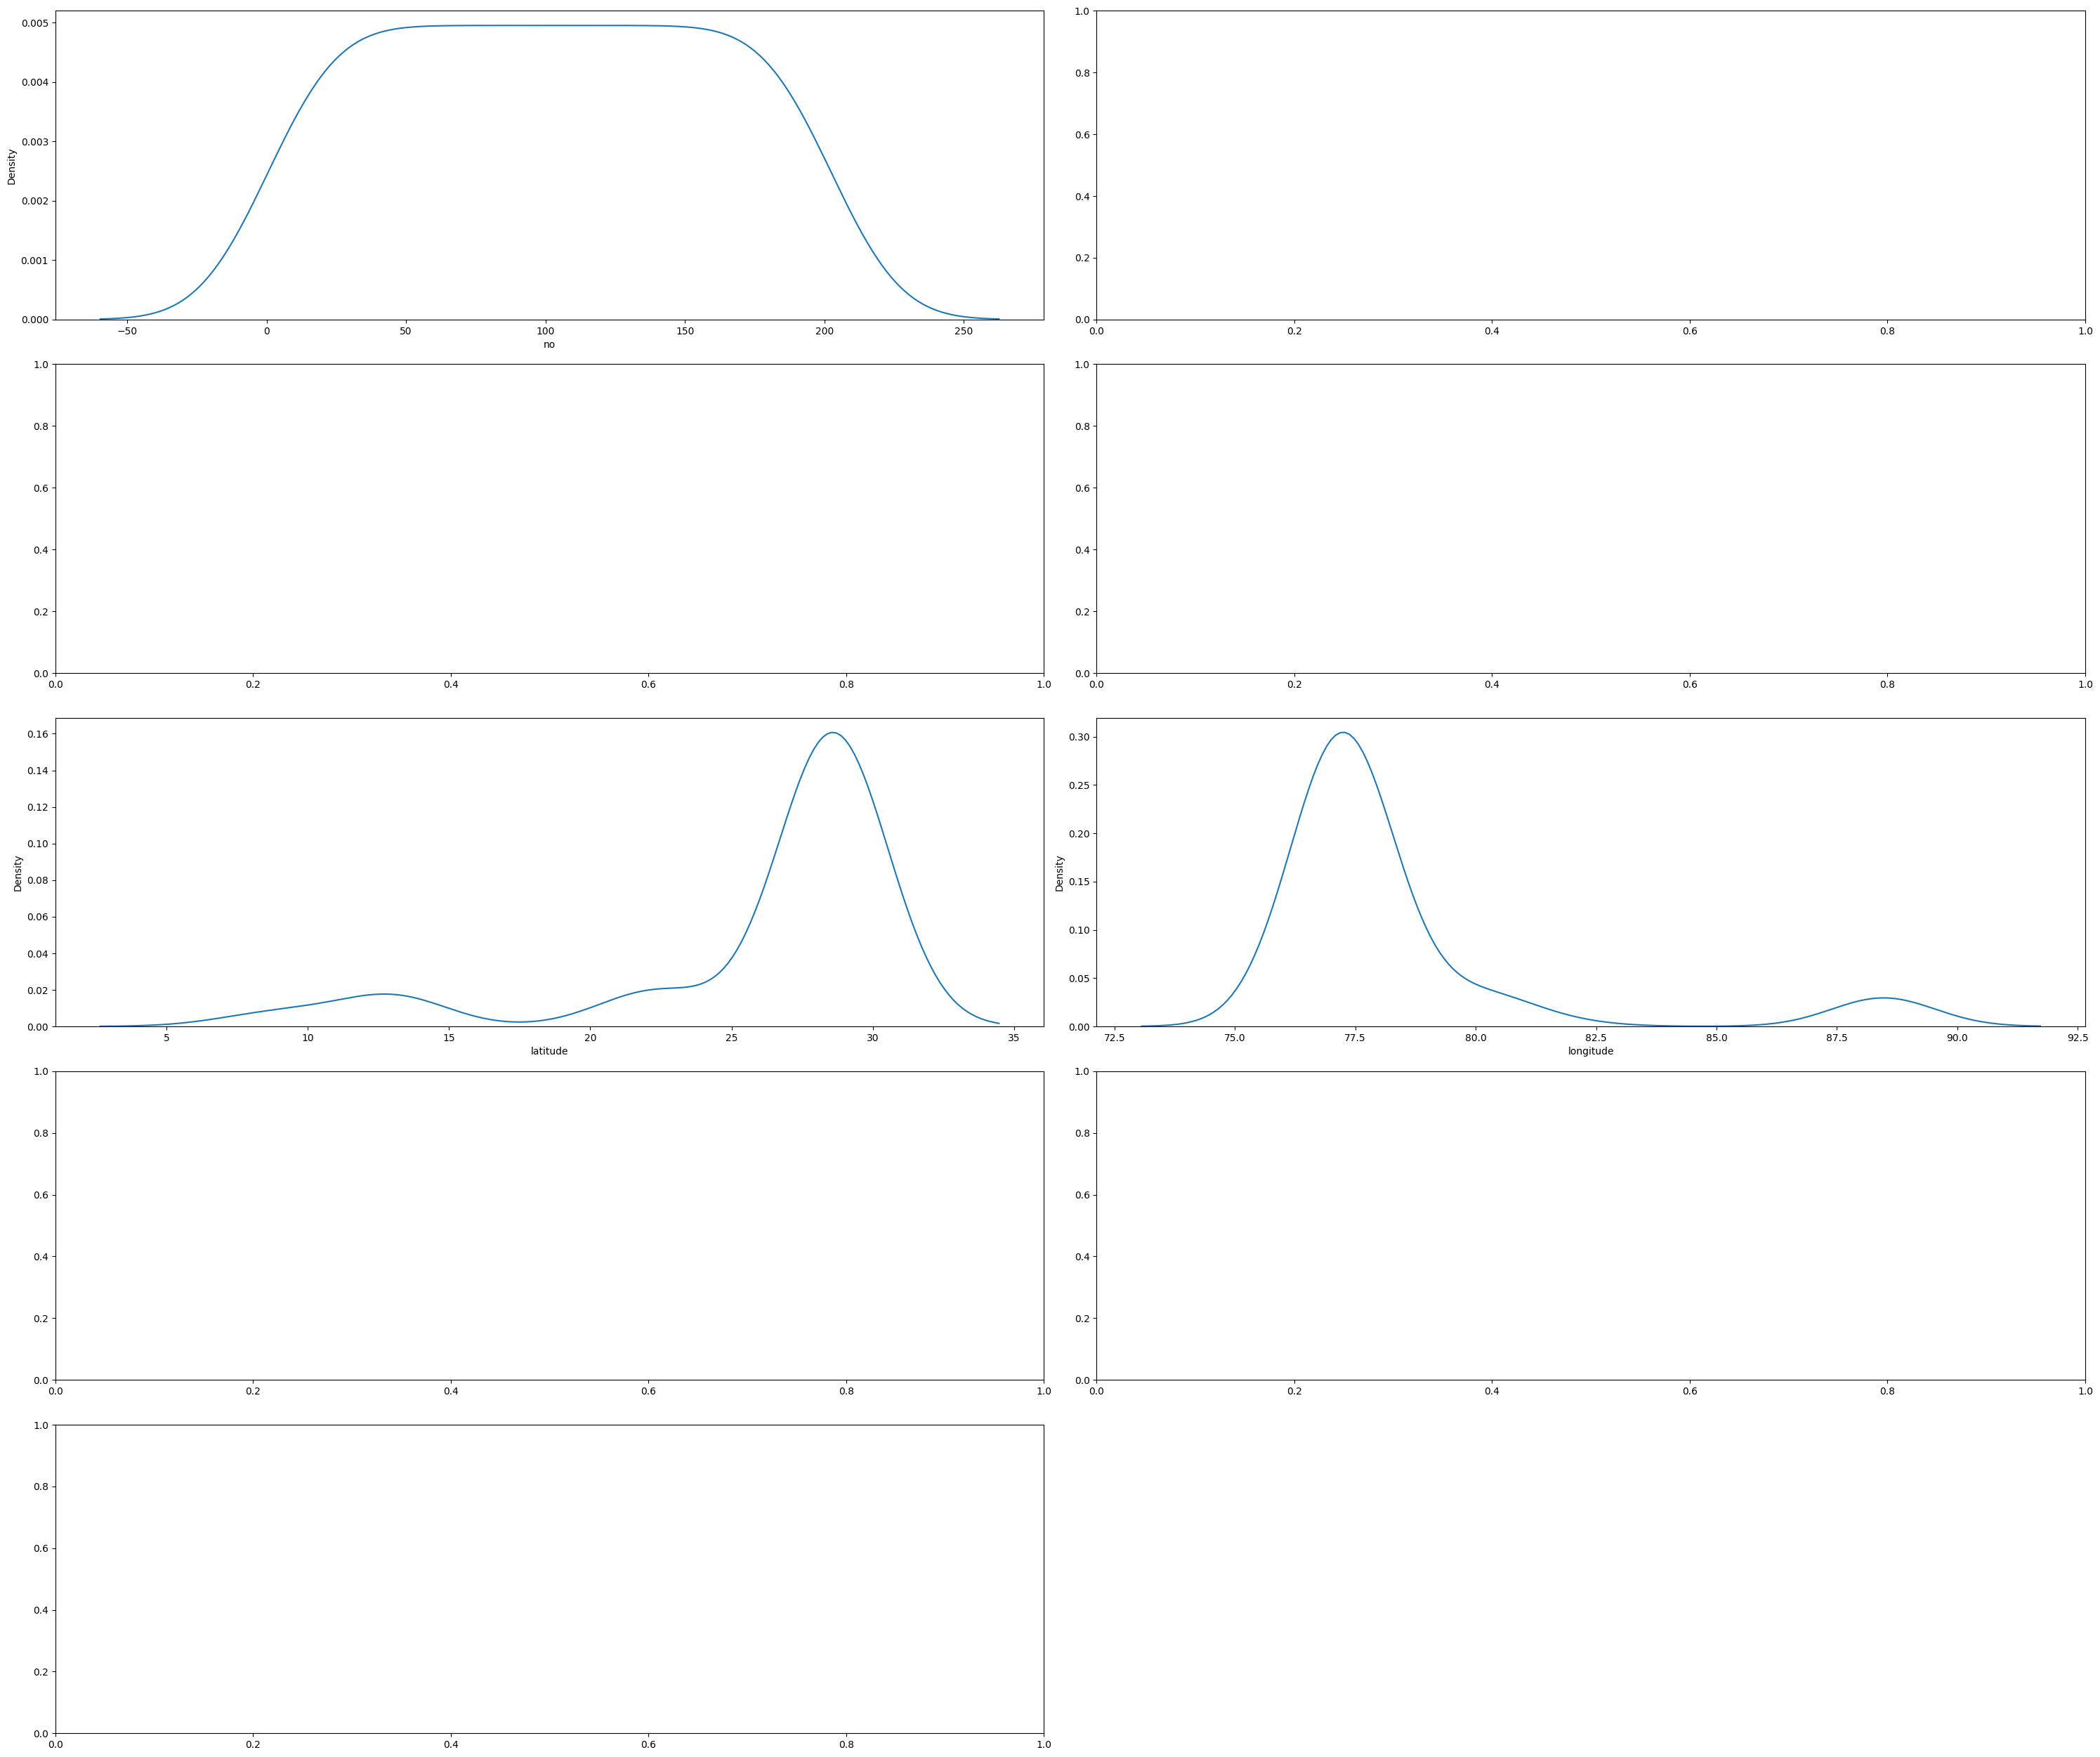

In [10]:
fig, axes = plt.subplots(9, 2, figsize=(30, 45))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        axes[i].set_xlabel(col)
        sns.kdeplot(df[col], ax=axes[i])

for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

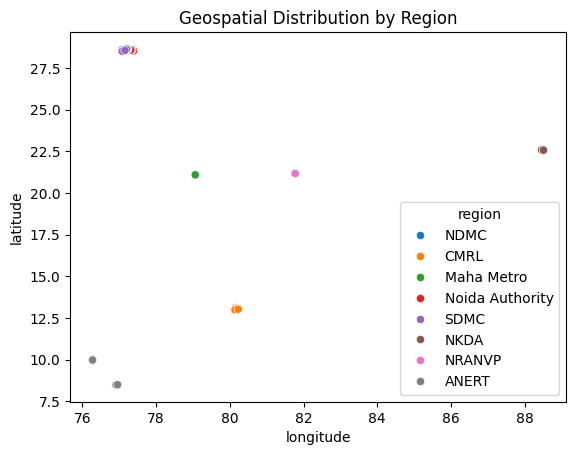

In [11]:
sns.scatterplot(x='longitude', y='latitude', data=df, hue='region')
plt.title('Geospatial Distribution by Region')
plt.show()

C:\Users\folyl\AppData\Local\Temp\ipykernel_12860\1121433138.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set1')


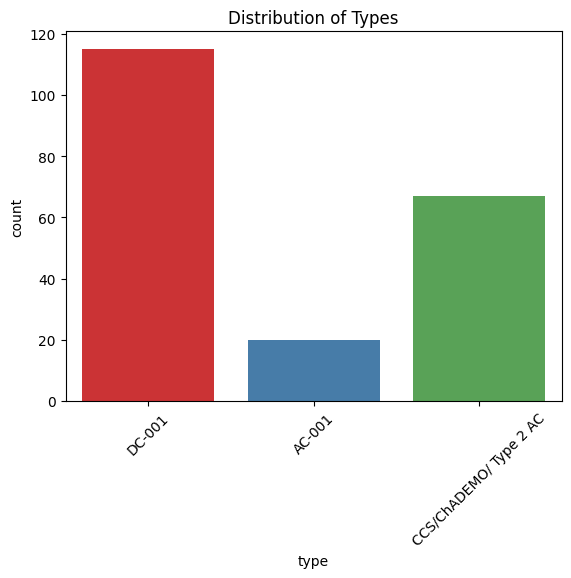

In [12]:
sns.countplot(x='type', data=df, palette='Set1')
plt.title('Distribution of Types')
plt.xticks(rotation=45)
plt.show()

In [13]:
power = df['power']
power

0      15 kW
1      15 kW
2      15 kW
3      15 kW
4      15 kW
       ...  
197    142kW
198    15 kW
199    15 kW
200    15 kW
201    15 kW
Name: power, Length: 202, dtype: object

In [14]:
listnew=[]
for i in power:
  listnew.append(i)
print(listnew)

['15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '10(3.3 kW each)', '15 kW', '10(3.3 kW each)', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '10(3.3 kW each)', '15 kW', '10(3.3 kW each)', '15 kW', '10(3.3 kW each)', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '10(3.3 kW each)', '15 kW', '10(3.3 kW each)', '15 kW', '10(3.3 kW each)', '15 kW', '10(3.3 kW each)', '15 kW', '10(3.3 kW each)', '15 kW', '10(3.3 kW each)', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '142kW', '142kW', '142kW', '142kW', '142kW', '142kW', '142kW', '15 kW', '15 kW'

In [15]:
final = []
new=[0,5]
for data in listnew:
  for j in data:
    if data[1] in new:
      final.append(data[:1])
    else:
      final.append(data[:2])
print(final)

['15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '10', '10

In [16]:
fin = list(map(int, final))
print(fin)

[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 15, 15, 15, 15, 15, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,

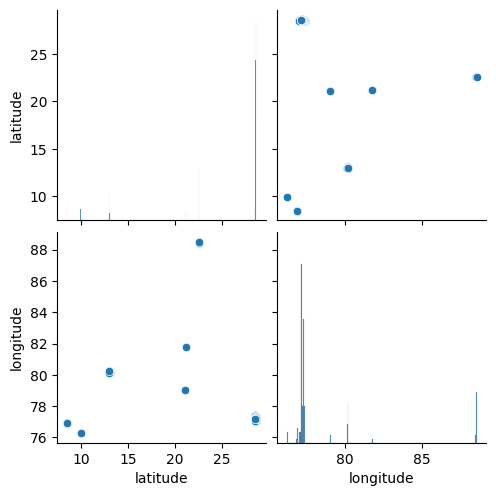

In [17]:
sns.pairplot(df[['latitude', 'longitude', 'power', 'service']])
# plt.suptitle('Pair Plot for Numerical Variables')
plt.show()

In [18]:
X = df.iloc[:,[4,5]].values
print(X)

[[28.6007255 77.2262524]
 [28.6007255 77.2262524]
 [28.5883031 77.2176972]
 [28.5826538 77.2200872]
 [28.584485  77.220316 ]
 [28.6023562 77.1866178]
 [28.6336861 77.2181403]
 [28.6304482 77.2255578]
 [28.5838828 77.163408 ]
 [28.6003333 77.2268889]
 [28.633675  77.2234929]
 [28.6325843 77.2229787]
 [28.6317294 77.2221076]
 [28.633841  77.2074439]
 [28.6281626 77.2155151]
 [28.6281626 77.2155151]
 [28.6350113 77.2196112]
 [28.6338828 77.2215424]
 [28.6318964 77.2215824]
 [28.6242518 77.2125818]
 [28.5772318 77.1972385]
 [28.6337975 77.2174553]
 [28.5838046 77.2218225]
 [28.617783  77.2129959]
 [28.617783  77.2129959]
 [28.6268691 77.231853 ]
 [28.5852879 77.177094 ]
 [28.586617  77.19364  ]
 [28.586617  77.19364  ]
 [28.6336306 77.220579 ]
 [28.6329899 77.2179805]
 [28.6340719 77.2187798]
 [12.9959222 80.2102867]
 [12.9959222 80.2102867]
 [21.0868801 79.0635586]
 [21.0868801 79.0635586]
 [28.5853056 77.191    ]
 [28.6222241 77.2142492]
 [28.6023562 77.1866178]
 [28.5852879 77.177094 ]


In [19]:
wcss =[]

for i in range(1,11):
  kmeans= KMeans (n_clusters=i,init= 'k-means++', random_state=100)
  kmeans.fit(X)


  wcss.append(kmeans.inertia_)

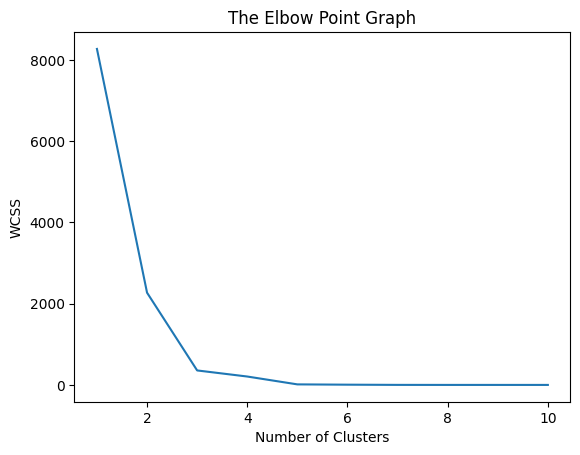

In [20]:
sns.set
plt.plot(range(1,11),wcss)

plt.title( 'The Elbow Point Graph')

plt.xlabel('Number of Clusters')

plt.ylabel('WCSS')
plt.show()

In [21]:
n_clusters = 3
n_init = 20

kmeans = KMeans(n_clusters =3, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)

print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 2 2
 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 0 0 2 2 2 2 1 1 1 1 0]


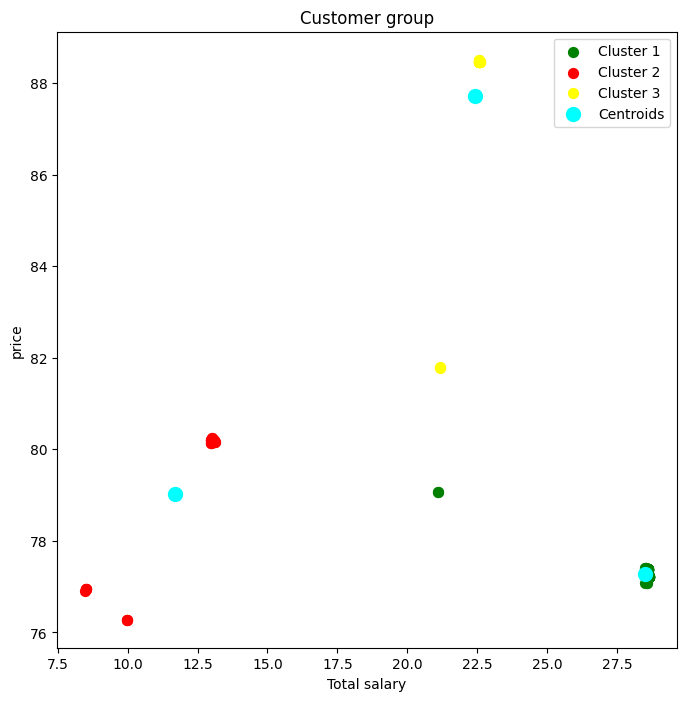

In [22]:
plt.figure(figsize=(8, 8))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s=50, c='yellow', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='cyan', label='Centroids')
plt.title('Customer group')
plt.xlabel("Total salary")
plt.ylabel("price")
plt.legend()
plt.show()

In [23]:
selected_attributes = ['latitude', 'longitude']
X = df[selected_attributes]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


n_components = 2
pca = PCA(n_components=n_components)

principal_components = pca.fit_transform(X_scaled)


column_names = [f"PCA_Component_{i+1}" for i in range(n_components)]

pca_df = pd.DataFrame(data=principal_components, columns=column_names)


print(pca_df)

     PCA_Component_1  PCA_Component_2
0           0.605905         0.060469
1           0.605905         0.060469
2           0.606295         0.056944
3           0.605035         0.056777
4           0.605213         0.057061
..               ...              ...
197        -1.870473        -2.539483
198        -1.861824        -2.550801
199        -1.527740        -2.507268
200        -1.870473        -2.539483
201         0.616160         0.039343

[202 rows x 2 columns]


In [24]:
X = df[['latitude', 'longitude']]
y = df['power']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)
confusion = confusion_matrix(Y_test, Y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.49
Classification Report:
                 precision    recall  f1-score   support

10(3.3 kW each)       0.31      0.80      0.44         5
          142kW       0.44      0.54      0.48        13
          15 kW       0.75      0.39      0.51        23

       accuracy                           0.49        41
      macro avg       0.50      0.58      0.48        41
   weighted avg       0.60      0.49      0.50        41

Confusion Matrix:
[[4 1 0]
 [3 7 3]
 [6 8 9]]


Buying behaviour

In [25]:
df = pd.read_csv("Dataset/automobile_buying_behaviour_india.csv")
df

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000


In [26]:
df.size

1287

In [27]:
df.shape

(99, 13)

In [28]:
df.columns.values.tolist()

['Age',
 'Profession',
 'Marrital Status',
 'Education',
 'No of Dependents',
 'Personal loan',
 'House Loan',
 'Wife Working',
 'Salary',
 'Wife Salary',
 'Total Salary',
 'Make',
 'Price']

In [29]:
features = df.columns.values.tolist()

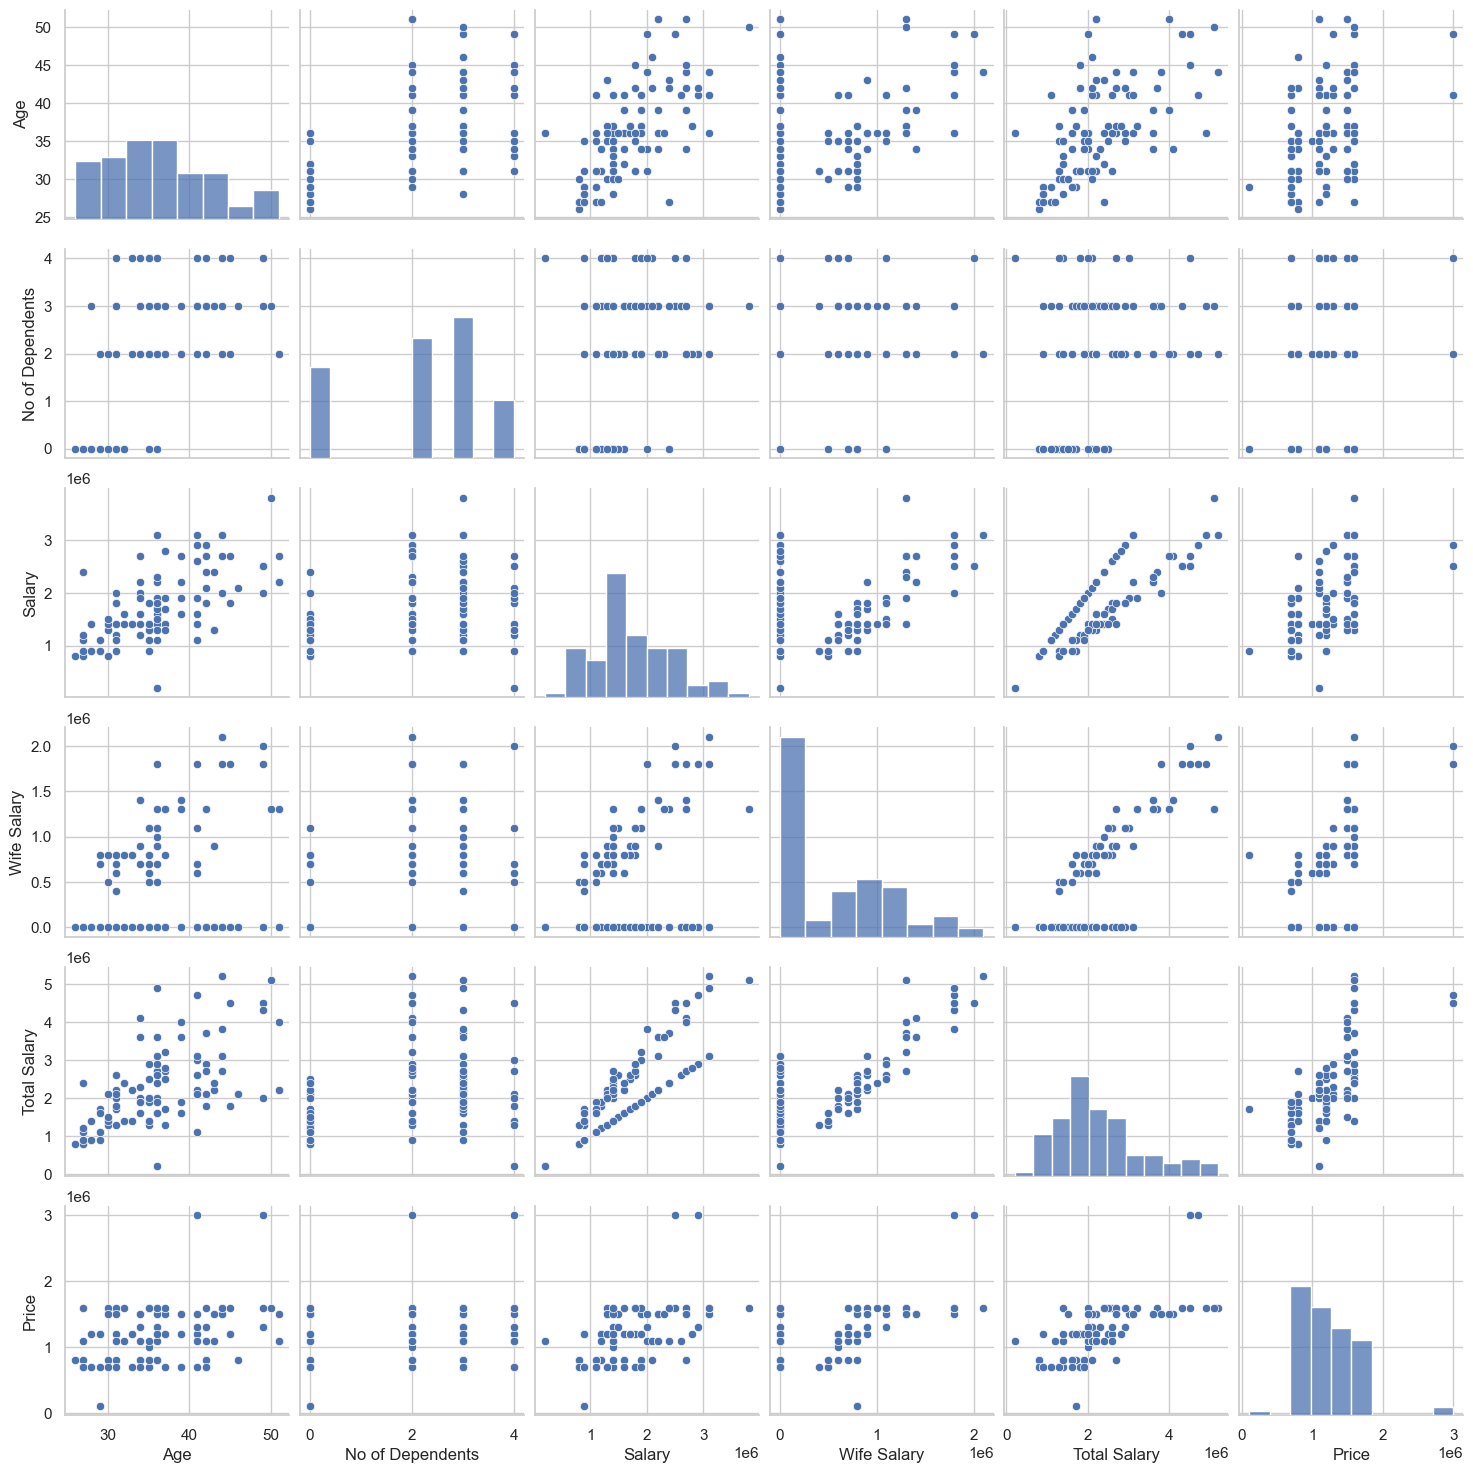

In [30]:
sns.set(style="whitegrid")

attributes_to_visualize = ['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
                           'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
                           'Total Salary', 'Make', 'Price']

sns.pairplot(df[attributes_to_visualize])
plt.show()

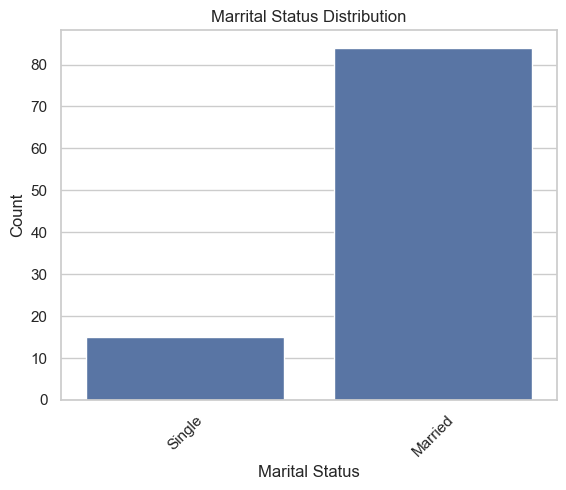

In [31]:
sns.countplot(data=df, x='Marrital Status')
plt.title("Marrital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

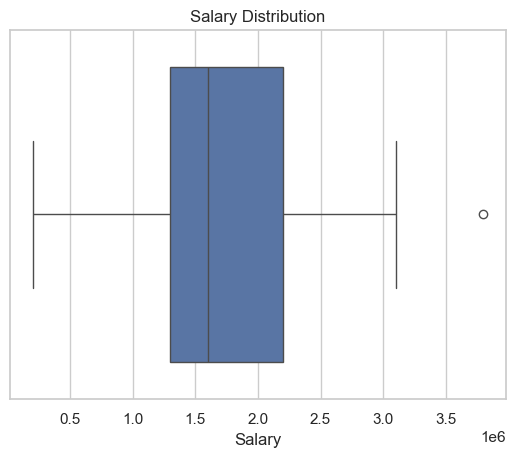

In [32]:
sns.boxplot(data=df, x='Salary')
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.show()

In [33]:
X = df.iloc[:,[10,12]].values
print(X)

[[ 800000  800000]
 [2000000 1000000]
 [1800000 1200000]
 [2200000 1200000]
 [2600000 1600000]
 [ 900000  700000]
 [1800000 1200000]
 [1400000  700000]
 [2000000 1100000]
 [1900000  800000]
 [2000000 1600000]
 [1400000  700000]
 [1700000  110000]
 [1400000  800000]
 [1300000  700000]
 [4500000 3000000]
 [ 800000  800000]
 [ 800000  700000]
 [ 900000 1200000]
 [1300000  700000]
 [2500000 1200000]
 [1900000  800000]
 [2400000 1600000]
 [1400000  700000]
 [2000000 1100000]
 [2900000 1600000]
 [1300000  700000]
 [1600000  800000]
 [2600000 1200000]
 [2700000 1600000]
 [1100000  700000]
 [2100000 1300000]
 [3000000 1500000]
 [2200000 1500000]
 [2100000 1100000]
 [3700000 1600000]
 [1600000 1200000]
 [2100000 1500000]
 [1400000 1600000]
 [2200000 1100000]
 [1700000  800000]
 [1400000 1100000]
 [2400000 1600000]
 [2300000 1300000]
 [1600000  800000]
 [3600000 1500000]
 [ 200000 1100000]
 [2600000 1300000]
 [1600000  800000]
 [3100000 1500000]
 [2000000 1300000]
 [4300000 1600000]
 [2700000 16

In [34]:
wcss =[]

for i in range(1,11):
  kmeans= KMeans (n_clusters=i,init= 'k-means++', random_state=42)
  kmeans.fit(X)


  wcss.append(kmeans.inertia_)

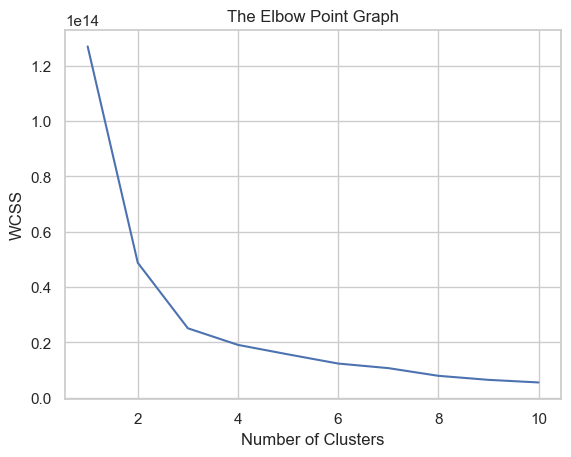

In [35]:
sns.set
plt.plot(range(1,11),wcss)

plt.title( 'The Elbow Point Graph')

plt.xlabel('Number of Clusters')

plt.ylabel('WCSS')
plt.show()

In [36]:
n_clusters = 3
n_init = 20

kmeans = KMeans(n_clusters =3, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)

print(Y)

[1 2 1 2 2 1 1 1 2 1 2 1 1 1 1 0 1 1 1 1 2 1 2 1 2 2 1 1 2 2 1 2 2 2 2 0 1
 2 1 2 1 1 2 2 1 0 1 2 1 2 2 0 2 0 0 2 2 1 1 1 1 1 2 1 2 1 0 2 0 1 2 2 1 2
 2 0 1 2 2 0 2 0 2 2 2 1 1 2 0 1 1 0 2 1 2 0 2 0 2]


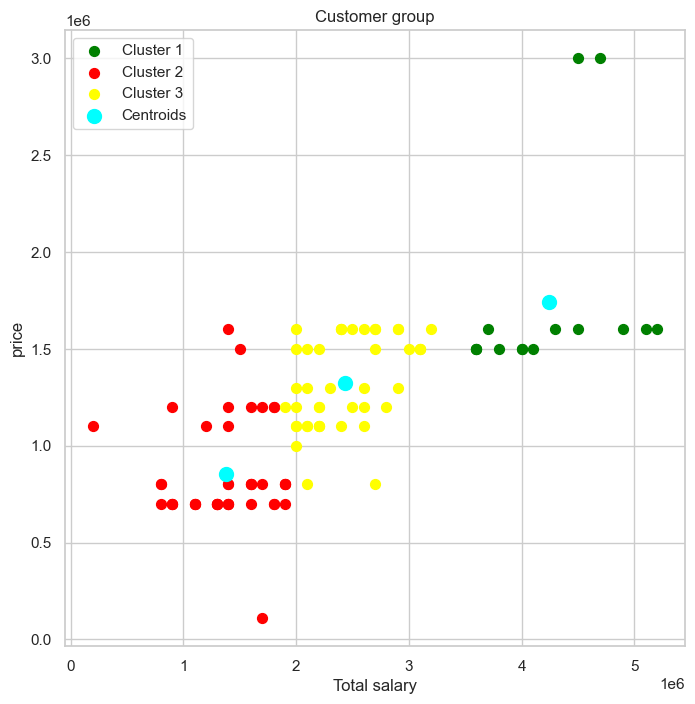

In [37]:
plt.figure(figsize=(8, 8))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s=50, c='yellow', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='cyan', label='Centroids')
plt.title('Customer group')
plt.xlabel("Total salary")
plt.ylabel("price")
plt.legend()
plt.show()

In [38]:
selected_attributes = ['Total Salary', 'Price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_components = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_scaled)
column_names = [f"PCA_Component_{i+1}" for i in range(n_components)]
pca_df = pd.DataFrame(data=principal_components, columns=column_names)
print(pca_df.head)

<bound method NDFrame.head of     PCA_Component_1  PCA_Component_2
0         -1.634550        -0.354909
1         -0.498168         0.131976
2         -0.308691        -0.328045
3         -0.038147        -0.057500
4          0.881895        -0.436453
..              ...              ...
94         0.746623        -0.571726
95         2.572799         1.254450
96        -0.200521         0.104874
97         1.666427         0.672827
98        -0.200521         0.104874

[99 rows x 2 columns]>


In [39]:
X = df[selected_attributes]
Y = df[["Age"]]

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [41]:
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)
confusion = confusion_matrix(Y_test, Y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.05
Classification Report:
              precision    recall  f1-score   support

          27       0.17      1.00      0.29         1
          29       0.00      0.00      0.00         2
          30       0.00      0.00      0.00         0
          31       0.00      0.00      0.00         4
          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         0
          34       0.00      0.00      0.00         2
          35       0.00      0.00      0.00         3
          36       0.00      0.00      0.00         3
          37       0.00      0.00      0.00         0
          39       0.00      0.00      0.00         0
          41       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         1
          50       0.00      0.00      0.00         1
          51       0.00      0.00      0.00         1

    accuracy                           0.05        20
   macro avg       0.01      0.07      0.0

d:\Programs_Practice\Python_Practice\Feynn Labs\EV_Market_Segmentation\venv\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\Programs_Practice\Python_Practice\Feynn Labs\EV_Market_Segmentation\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Programs_Practice\Python_Practice\Feynn Labs\EV_Market_Segmentation\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo